In [175]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd

%matplotlib inline
sns.set(style = 'whitegrid' , color_codes=True, font_scale=1.4)

In [176]:
import warnings
warnings.filterwarnings('ignore')

In [177]:
df = pd.read_csv("diamonds.csv")

In [178]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [179]:
"""We can immediately drop the Unnamed: 0 column as we already have indexes"""
df = df.drop('Unnamed: 0', axis=1)

In [180]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [182]:
"""We can see tha the cut, color, and clarity features are more than likely string values
   The LabelEncoder class will be needed before we can give this data to a machine learning algorithm
   
   Let's check for any null values"""
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [183]:
"""No null values
   Let's get some basic information"""
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [184]:
"""Everything looks normal excpet for the min attribute for x, y, and z. These represeent
   the diamonds length, width and height, and having the minimum at 0 does not make
   any sense. Lets see how many of them there are"""
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)].count()

carat      20
cut        20
color      20
clarity    20
depth      20
table      20
price      20
x          20
y          20
z          20
dtype: int64

In [185]:
"""We can see there are 20 rows with diamonds that have dimensions of 0 in either
   x, y, or z. The simplest thing to do is simply drop them"""
df = df[(df[['x','y','z']] != 0).all(axis=1)]

In [186]:
len(df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)])

0

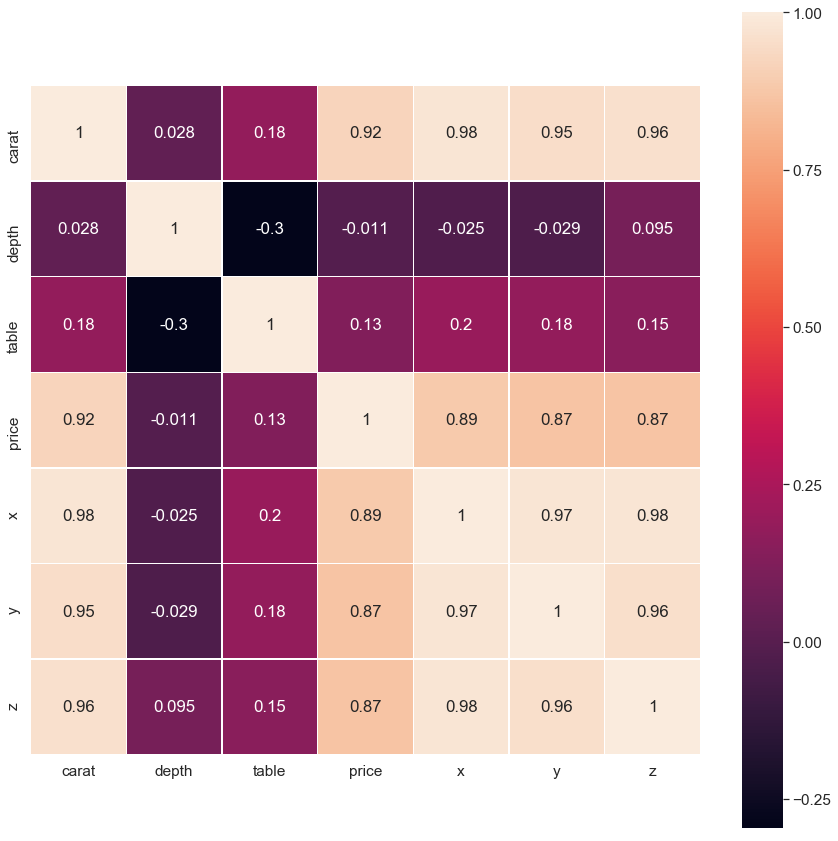

In [187]:
"""Our data with 0's that don't make sense have been removed. Lets look at correlations"""
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, 
            square=True,
            annot=True,  
            linewidths=.5, 
            ax=ax
)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006A11C149E8>,
      dtype=object)

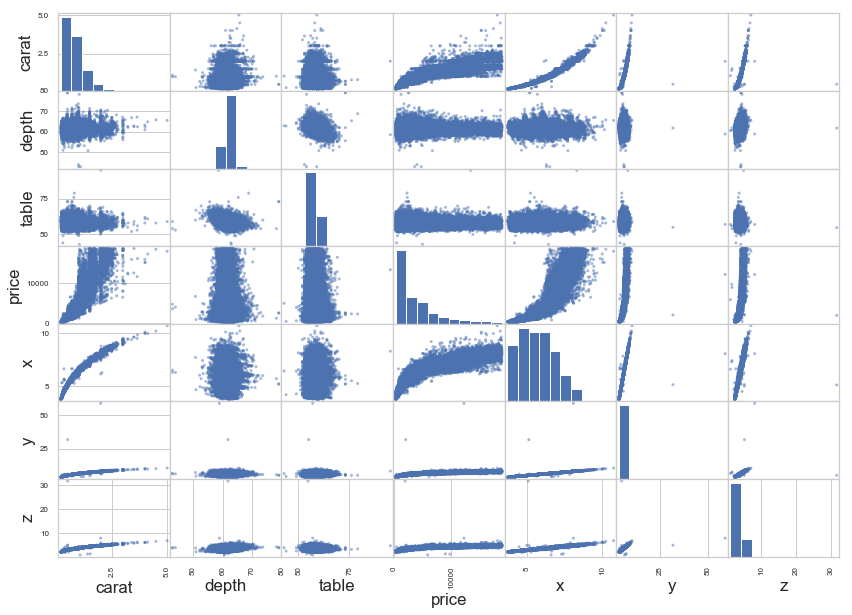

In [188]:
"""We can see that price (our target), is highly correlated with carat, and the diamonds
   dimensions, x, y, and z. This makes sense, as the carat represents the weight, and a
   diamond that weighs more and has a bigger size will more than likely have a bigger
   price associated with it. Carat having high correlation with x, y, and z also makes
   sense as a diamond that weighs more has larger dimensions. We can also see
   that depth and table have small, but not insignificant, inverse relationships, and the
   table feature has a very small positive relationship with price"""
from pandas.plotting import scatter_matrix
scatter_df = df.drop(['cut', 'color', 'clarity'], axis=1)
scatter_matrix(scatter_df, figsize=(14,10))

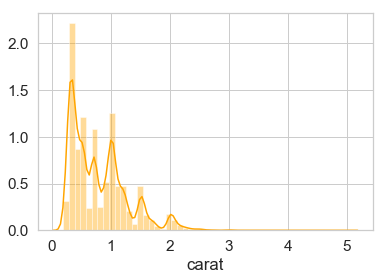

In [189]:
sns.distplot(df['carat'], color='orange')

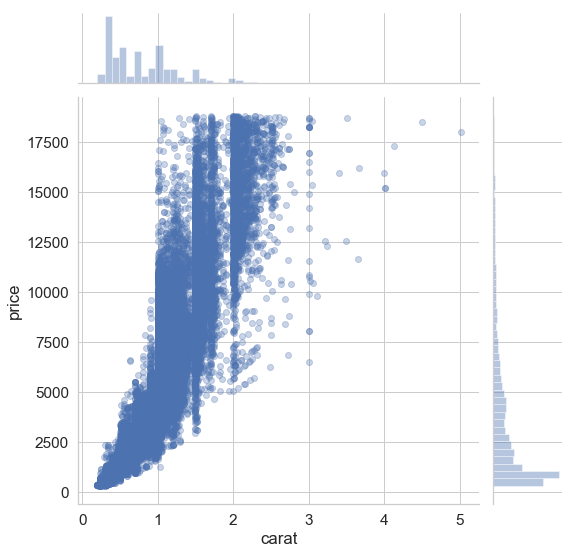

In [190]:
sns.jointplot(x='carat', 
              y='price', 
              data=df, 
              size=8,
              kind="scatter", 
              alpha=0.3
)

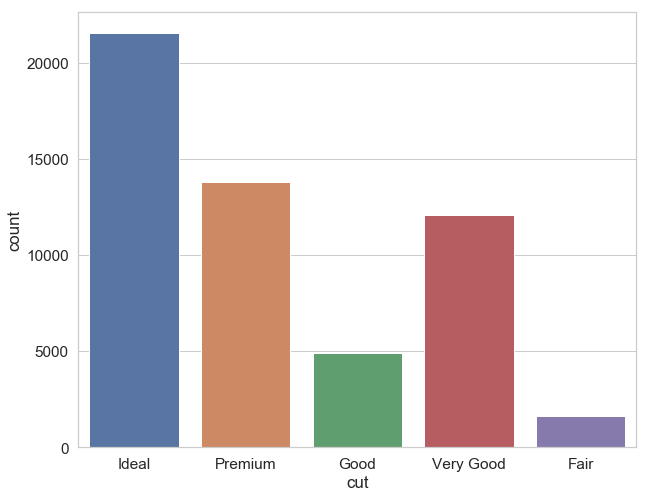

In [191]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(df['cut'], 
              ax=ax
)

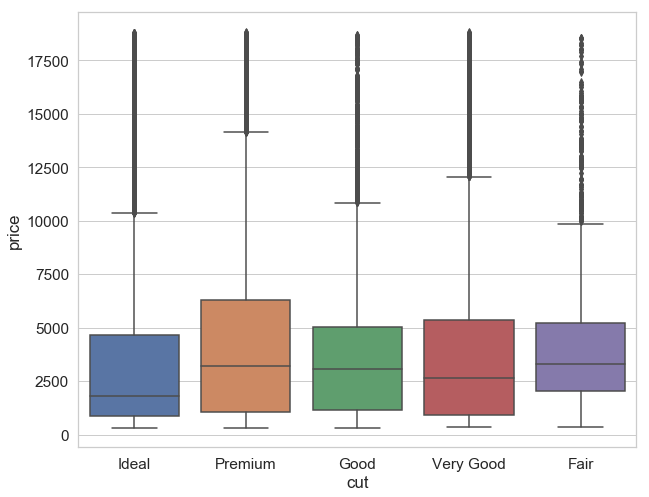

In [192]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(
    x='cut',
    y='price',
    data=df,
    ax=ax
)

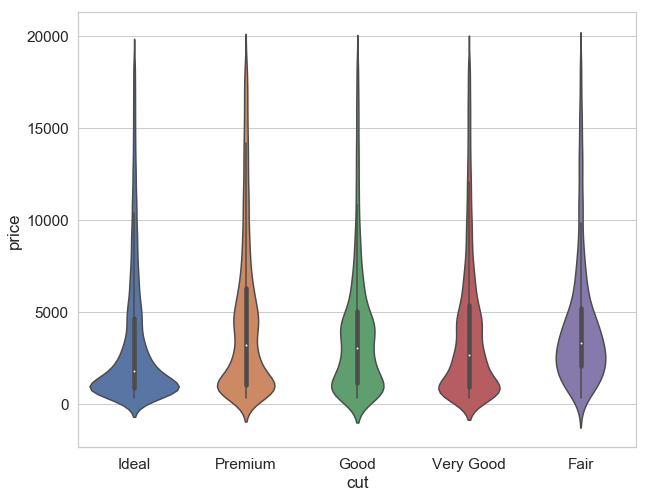

In [193]:
fig, ax = plt.subplots(figsize=(10,8))
sns.violinplot(
    x='cut',
    y='price',
    data=df,
    ax=ax
)

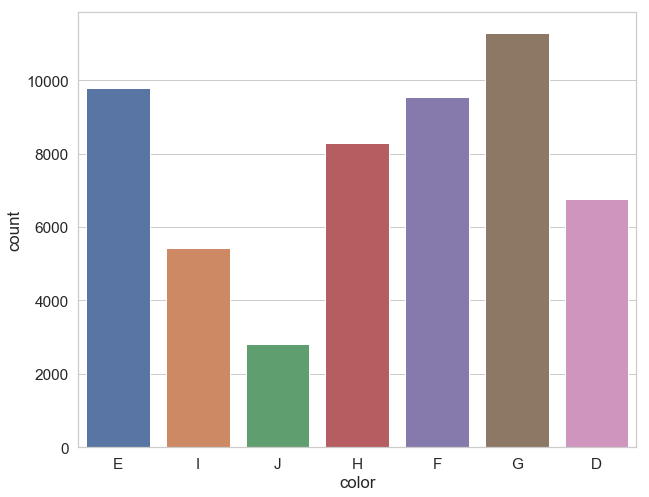

In [194]:
"""D,E,F - represent colorless
   G,H,I,J - represent near colorless
   K,L,M - represent faint yellow
   N,O,P,Q,R - represent very light yellow
   S,T,U,V,W,X,Y,Z - represent light yellow"""
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(df['color'], 
              ax=ax
)

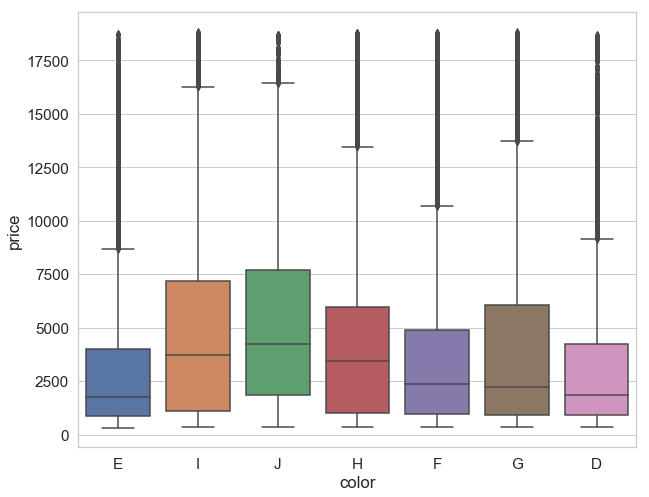

In [195]:
"""We can see that we only have colorless and near-colorless diamonds in this dataset"""
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(
    x='color',
    y='price',
    data=df,
    ax=ax
)

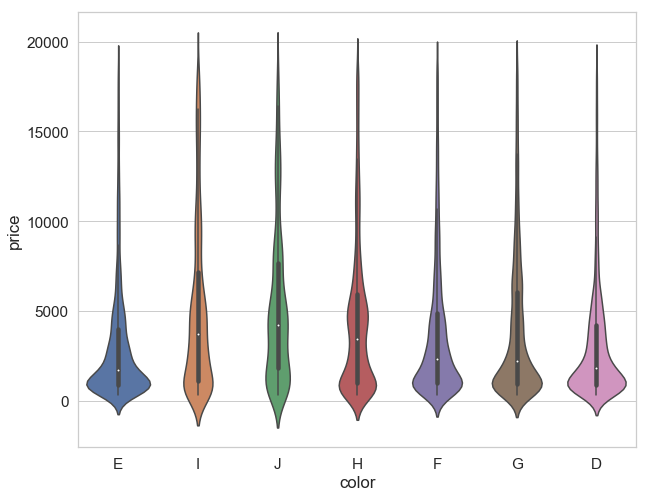

In [196]:
"""Near colorless have the highest prices. Lets look at the densities as well"""
fig, ax = plt.subplots(figsize=(10,8))
sns.violinplot(
    x='color',
    y='price',
    data=df,
    ax=ax
)

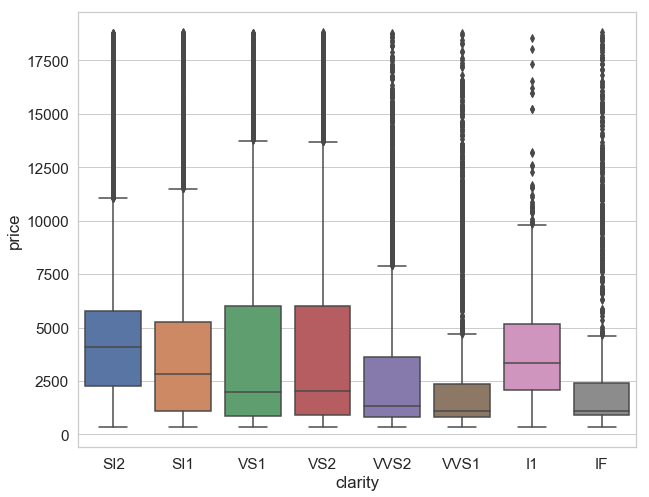

In [197]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(
    x='clarity',
    y='price',
    data=df,
    ax=ax
)

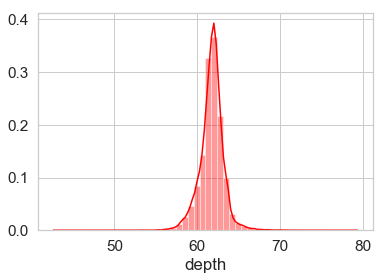

In [198]:
"""Our boxplot indicates that the VS1 and VS2 clarities for the diamonds have the
   hightest prices"""
sns.distplot(df['depth'], color='red')

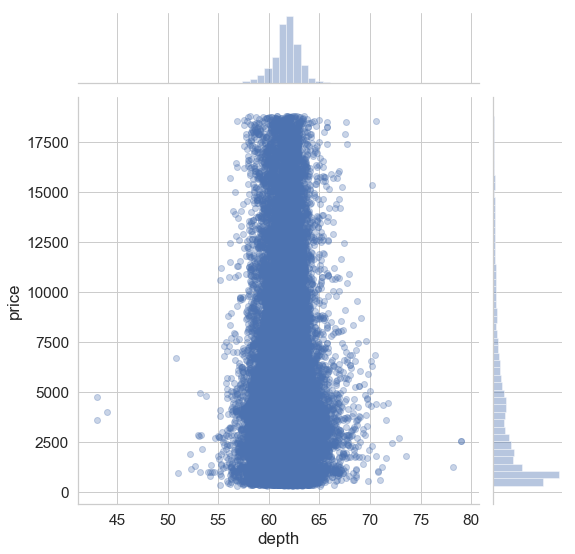

In [199]:
"""The depth feature is shown to have a normal distribution. Lets plot it against our target"""
sns.jointplot(x='depth', 
              y='price', 
              data=df, 
              size=8,
              kind="scatter", 
              alpha=0.3
)

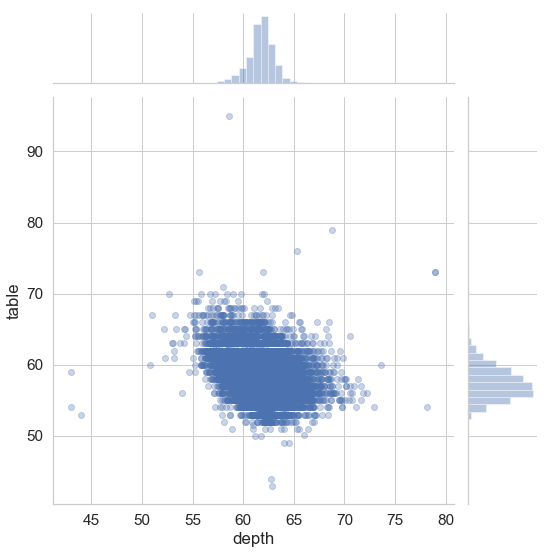

In [200]:
"""A side journey that is not focused on the target. I am interested in looking at the
   scatter plot for the table and depth features based on their correlation"""
sns.jointplot(x='depth', 
              y='table', 
              data=df, 
              size=8,
              kind="scatter", 
              alpha=0.3
)

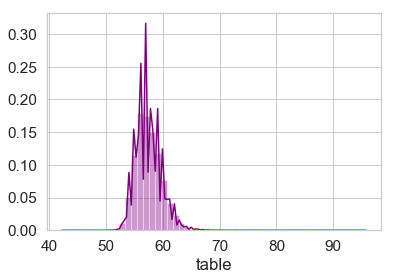

In [201]:
"""We can see the small, negative correlation between depth and table. Let's look at the
   table feature"""
sns.distplot(df['table'], color='purple')

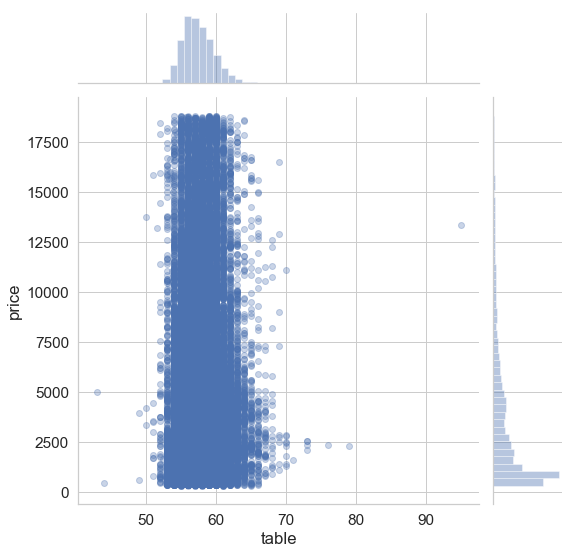

In [202]:
"""The depth feature is shown to have a normal distribution. Lets plot it against our target"""
sns.jointplot(x='table', 
              y='price', 
              data=df, 
              size=8,
              kind="scatter", 
              alpha=0.3
)

(2, 10)

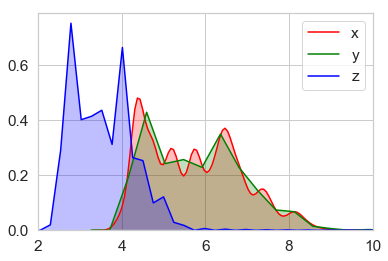

In [203]:
sns.kdeplot(df['x'], shade=True, color='red')
sns.kdeplot(df['y'], shade=True, color='green')
sns.kdeplot(df['z'], shade=True, color='blue')
plt.xlim(2,10)

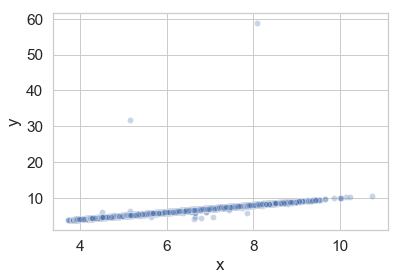

In [241]:
sns.scatterplot(x='x', y='y', data=df, alpha=0.3)

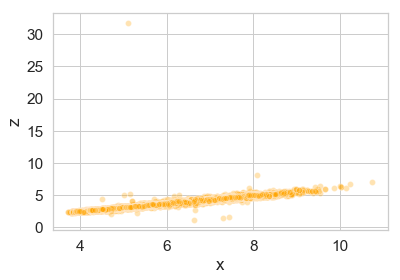

In [240]:
sns.scatterplot(x='x', y='z', color='orange', data=df, alpha=0.3)

(0, 15)

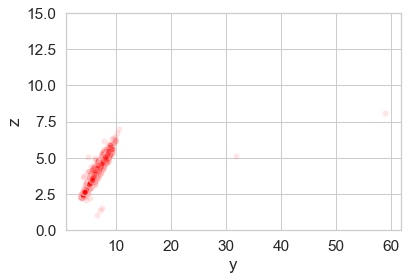

In [242]:
sns.scatterplot(x='y', y='z', color='red', data=df, alpha=0.1)
plt.ylim(0,15)

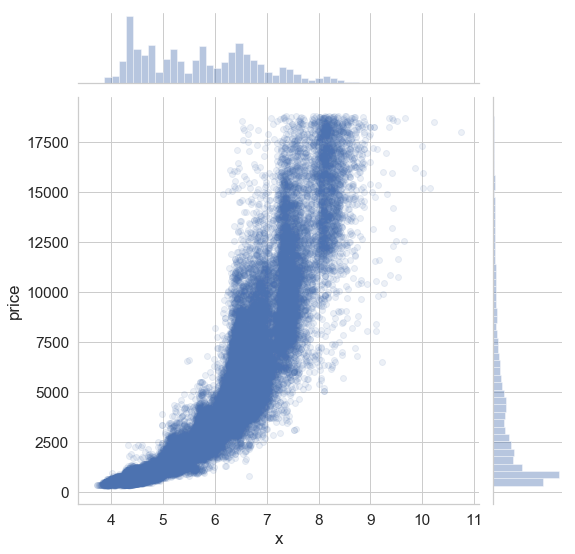

In [243]:
"""We can see that the dimensional features are all correlated with each other. This suggests
   that as one of the dimensions increases, the other two do as well. Lets plot the 
   dimensional features against our target"""
sns.jointplot(x='x', 
              y='price', 
              data=df, 
              size=8,
              kind="scatter", 
              alpha=0.1
)

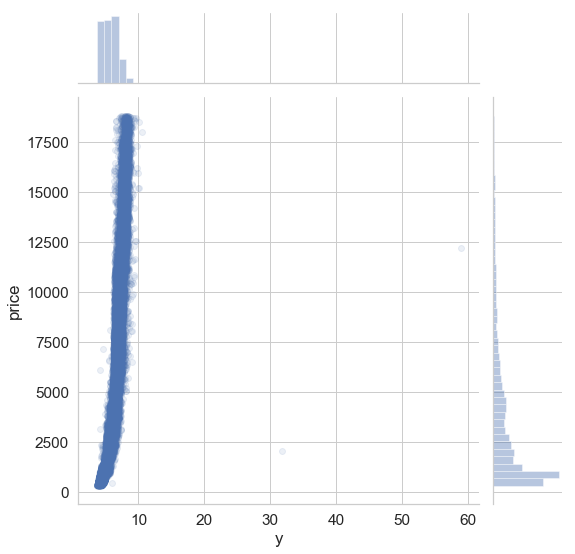

In [209]:
"""Lets plot the dimensional features against our target"""
sns.jointplot(x='y', 
              y='price', 
              data=df, 
              size=8,
              kind="scatter", 
              alpha=0.1
)

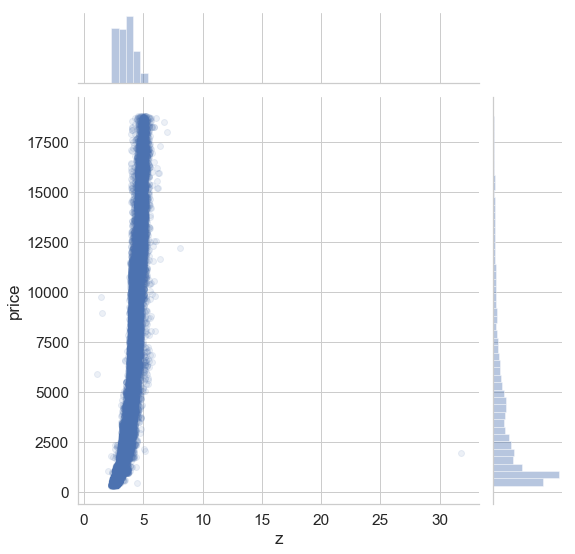

In [210]:
"""Lets plot the dimensional features against our target"""
sns.jointplot(x='z', 
              y='price', 
              data=df, 
              size=8,
              kind="scatter", 
              alpha=0.1
)

In [157]:
"""There is strong evidence that the price of a diamond is strongly associated with the dimensions
   We need to enconde our categorical data"""
from sklearn.preprocessing import LabelEncoder

encode_cut = LabelEncoder()
encode_color = LabelEncoder()
encode_clarity = LabelEncoder()

df['cut'] = encode_cut.fit_transform(df['cut'])
df['color'] = encode_color.fit_transform(df['color'])
df['clarity'] = encode_clarity.fit_transform(df['clarity'])

In [158]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [159]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [161]:
"""We will append the R2 scoers to an array, as well as the models for plotting at the end"""
r2_scores = []
models = ['Linear Regression', 
          'Ridge Regression', 
          'Lasso Regression',
          'Elastic Net',
          'Gradient Boost',
          'Ada Boost',
          'Random Forest']

In [162]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
scores = cross_val_score(estimator=lr,
                         X=X_train, 
                         y=y_train, 
                         cv=10
)
y_pred = lr.predict(X_test)

print('Linear Regression')
print('Score: %.4f' %lr.score(X_test,y_test))
print(scores)

mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred)**0.5
r2 = r2_score(y_test,y_pred)

print('\nMSE: %0.2f' %mse)
print('RMSE: %0.2f' %rmse)
print('R2: %0.2f' %r2)

r2_scores.append(r2) #append r2 score to our list

Linear Regression
Score: 0.8895
[0.88578283 0.87391182 0.88431249 0.88316478 0.89226802 0.87261933
 0.89140561 0.88334841 0.8874492  0.6771886 ]

MSE: 1771668.32
RMSE: 1331.04
R2: 0.89


In [163]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
scores = cross_val_score(estimator=ridge,
                         X=X_train, 
                         y=y_train, 
                         cv=10
)
y_pred = ridge.predict(X_test)

print('Ridge Regression')
print('Score: %.4f' %ridge.score(X_test,y_test))
print(scores)

mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred)**0.5
r2 = r2_score(y_test,y_pred)

print('\nMSE: %0.2f' %mse)
print('RMSE: %0.2f' %rmse)
print('R2: %0.2f' %r2)

r2_scores.append(r2) #append r2 score to our list

Ridge Regression
Score: 0.8895
[0.88578226 0.87392512 0.88431286 0.88316258 0.89226515 0.8726185
 0.89140016 0.88334819 0.88744249 0.68645775]

MSE: 1771618.33
RMSE: 1331.02
R2: 0.89


In [164]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
scores = cross_val_score(estimator=lasso,
                         X=X_train, 
                         y=y_train, 
                         cv=10
)
y_pred = lasso.predict(X_test)

print('Lasso Regression')
print('Score: %.4f' %lasso.score(X_test,y_test))
print(scores)

mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred)**0.5
r2 = r2_score(y_test,y_pred)

print('\nMSE: %0.2f' %mse)
print('RMSE: %0.2f' %rmse)
print('R2: %0.2f' %r2)

r2_scores.append(r2) #append r2 score to our list

Lasso Regression
Score: 0.8903
[0.88578309 0.87402253 0.88431455 0.88309398 0.8922324  0.87254325
 0.89129444 0.88331515 0.88734139 0.80782994]

MSE: 1758486.28
RMSE: 1326.08
R2: 0.89


In [165]:
from sklearn.linear_model import ElasticNet
net = ElasticNet()
net.fit(X_train, y_train)
scores = cross_val_score(estimator=net,
                         X=X_train, 
                         y=y_train, 
                         cv=10
)
y_pred = net.predict(X_test)

print('Elastic Net')
print('Score: %.4f' %net.score(X_test,y_test))
print(scores)

mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred)**0.5
r2 = r2_score(y_test,y_pred)

print('\nMSE: %0.2f' %mse)
print('RMSE: %0.2f' %rmse)
print('R2: %0.2f' %r2)

r2_scores.append(r2) #append r2 score to our list

Elastic Net
Score: 0.8176
[0.82911871 0.82063331 0.82422176 0.8215238  0.82757423 0.81365688
 0.82369041 0.82602597 0.82312019 0.80317318]

MSE: 2923490.61
RMSE: 1709.82
R2: 0.82


In [166]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(loss='ls', 
                               learning_rate=0.2, 
                               n_estimators=200,
                               random_state=42
)
gb.fit(X_train, y_train)
scores = cross_val_score(estimator=gb,
                         X=X_train, 
                         y=y_train, 
                         cv=10
)
y_pred = gb.predict(X_test)

print('Gradient Boost Regression')
print('Score: %.4f' %gb.score(X_test,y_test))
print(scores)

mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred)**0.5
r2 = r2_score(y_test,y_pred)

print('\nMSE: %0.2f' %mse)
print('RMSE: %0.2f' %rmse)
print('R2: %0.2f' %r2)

r2_scores.append(r2) #append r2 score to our list

Gradient Boost Regression
Score: 0.9784
[0.97813285 0.98017215 0.97802083 0.97752207 0.98006618 0.97608549
 0.97906464 0.97916461 0.97651527 0.9788654 ]

MSE: 345708.41
RMSE: 587.97
R2: 0.98


In [167]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(random_state=42)
ada.fit(X_train, y_train)
scores = cross_val_score(estimator=ada,
                         X=X_train, 
                         y=y_train, 
                         cv=10
)
y_pred = ada.predict(X_test)

print('Ada Boost Regression')
print('Score: %.4f' %ada.score(X_test,y_test))
print(scores)

mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred)**0.5
r2 = r2_score(y_test,y_pred)

print('\nMSE: %0.2f' %mse)
print('RMSE: %0.2f' %rmse)
print('R2: %0.2f' %r2)

r2_scores.append(r2) #append r2 score to our list

Ada Boost Regression
Score: 0.8957
[0.88229974 0.89005725 0.89869453 0.88046445 0.88732147 0.89145565
 0.88930933 0.87064364 0.89107357 0.89550954]

MSE: 1672255.51
RMSE: 1293.16
R2: 0.90


In [168]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
scores = cross_val_score(estimator=rf,
                         X=X_train, 
                         y=y_train, 
                         cv=10
)
y_pred = rf.predict(X_test)

print('Random Forest Regression')
print('Score: %.4f' %rf.score(X_test,y_test))
print(scores)

mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred)**0.5
r2 = r2_score(y_test,y_pred)

print('\nMSE: %0.2f' %mse)
print('RMSE: %0.2f' %rmse)
print('R2: %0.2f' %r2)

r2_scores.append(r2) #append r2 score to our list

Random Forest Regression
Score: 0.9815
[0.97827147 0.97910098 0.9796863  0.97894271 0.97859658 0.97711326
 0.97966361 0.97967006 0.97693897 0.97877796]

MSE: 296553.46
RMSE: 544.57
R2: 0.98


In [169]:
results = pd.DataFrame({'Models': models, 'R2 Scores': r2_scores})
results.sort_values(by='R2 Scores', ascending=False)

,Models,R2 Scores
6,Random Forest,0.981502
4,Gradient Boost,0.978436
5,Ada Boost,0.895692
2,Lasso Regression,0.890314
1,Ridge Regression,0.889495
0,Linear Regression,0.889491
3,Elastic Net,0.817646


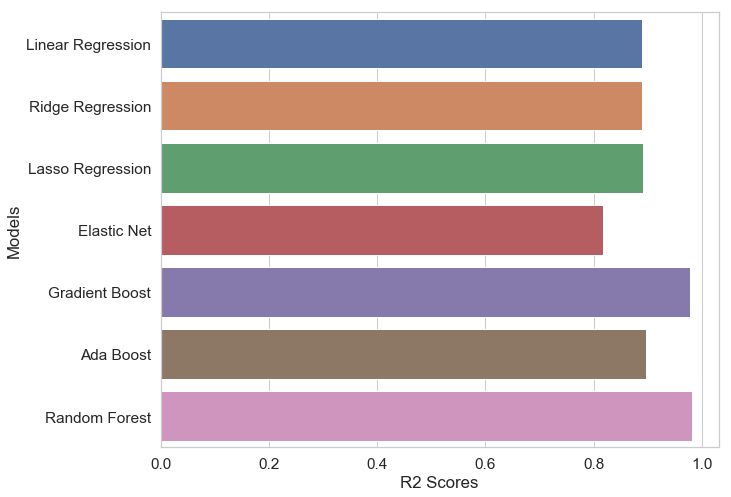

In [174]:
"""We can see that Random Forest has the highest scores"""
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='R2 Scores', y='Models', data=results, ax=ax)